In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
reviews = pd.read_csv('Datasets/reviews.csv')
reviews.drop('app_id', axis=1, inplace=True)
reviews.head()

,app_name,review_text,review_score,review_votes
0,Counter-Strike,Ruined my life.,1,0
1,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,Counter-Strike,This game saved my virginity.,1,0
3,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,Counter-Strike,"Easy to learn, hard to master.",1,1


In [30]:
reviews.sample(10)

,app_name,review_text,review_score,review_votes
5007461,Fallout,An amazing game that has aged very well.,1,0
292600,NaN,I originally played this on the PS2 when I was...,1,0
5645508,Rock Paper Scissors Champion,It s a nice game With a multiplayermode would...,1,1
981655,South Park™: The Stick of Truth™,Played it Made my character ♥♥♥♥ in toilet Pic...,1,0
639705,Dishonored,It's fun because you can choose to be stealthy...,1,0
3981810,Call of Duty: Black Ops III,LONG story....very short Bo2 &gt; Bo3 Anythin...,1,0
2464054,Space Engineers,Early Access Review,1,0
636572,Dishonored,Very fun and worth every penny!,1,0
1867026,Killing Floor 2,Early Access Review,1,1
5739161,Dragon Age: Origins - Ultimate Edition,Great game 10/10 would play again.,1,0


In [31]:
reviews.describe()

,review_score,review_votes
count,6.417106e+06,6.417106e+06
mean,6.394992e-01,1.472446e-01
std,7.687918e-01,3.543496e-01
min,-1.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00


In [32]:
reviews.isnull().sum()

app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64

In [44]:
reviews = reviews.dropna()
reviews.isnull().sum()

app_name        0
review_text     0
review_score    0
review_votes    0
dtype: int64

In [45]:
print(reviews['review_score'].value_counts())
print()
print(reviews['review_votes'].value_counts())

 1    5260420
-1    1156686
Name: review_score, dtype: int64

0    5472222
1     944884
Name: review_votes, dtype: int64


### Weighted review score
In order to give a proper score for each game, it would not be appropriate to just calculate the average (since in the case where an average of 1.0 across 1 review is against an average of 0.95 across 100 reviews, the latter would be considered better). Therefore an appropriate formula need to be chosen to calculate this. This [blog post](https://steamdb.info/blog/steamdb-rating/) gives a solution to this.

In [46]:
positive_reviews = reviews[reviews['review_score']==1].groupby('app_name').count()

In [47]:
# count and mean of review_score_and_votes grouped by game
reviews_by_group = reviews.groupby(reviews["app_name"]).review_score.agg(["count","mean"])
positive_reviews = reviews[reviews['review_score']==1].groupby('app_name').count()['review_score']
reviews_by_group['positive_rate'] = positive_reviews/reviews_by_group['count']
reviews_by_group.sample(5)

,count,mean,positive_rate
app_name,,,
JDM Tuner Racing,76,-0.263158,0.368421
Vector Strain,18,0.777778,0.888889
Mashed,95,0.515789,0.757895
Super Goo Goo,6,0.333333,0.666667
Candle,29,1.000000,1.000000


In [48]:
import math 

def calc_weighted_score(rate, total):
    return rate - (rate - 0.5) * math.pow(2, -math.log10(total+1))

weighted_score = []
for r, t in zip(reviews_by_group['positive_rate'], reviews_by_group['count']):
    weighted_score.append(calc_weighted_score(r, t))
reviews_by_group['weighted_score'] = weighted_score
reviews_by_group.sample(5)

,count,mean,positive_rate,weighted_score
app_name,,,,
At the Mountains of Madness,26,-0.384615,0.307692,0.378996
Putt-Putt Enters the Race,36,0.944444,0.972222,0.812975
GT Legends,92,0.782609,0.891304,0.791318
One Finger Death Punch,7737,0.971565,0.985783,0.952985
Tulpa,85,-0.176471,0.411765,0.434848


### Analyzing new features

In [49]:
reviews_by_group.sort_values('weighted_score',ascending=False)[:10]

,count,mean,positive_rate,weighted_score
app_name,,,,
Portal 2,38924,0.975542,0.987771,0.967521
Sid Meier's Civilization V,8693,0.999310,0.999655,0.967083
Half-Life 2,6483,0.999075,0.999537,0.963967
Factorio,12553,0.977854,0.988927,0.960391
South Park™: The Stick of Truth™,3479,0.997700,0.998850,0.956010
Portal,16293,0.963174,0.981587,0.955602
The Binding of Isaac: Rebirth,23306,0.957264,0.978632,0.955444
Terraria,84828,0.941576,0.970788,0.955329
"Star Wars: Battlefront 2 (Classic, 2005)",2976,1.000000,1.000000,0.954995


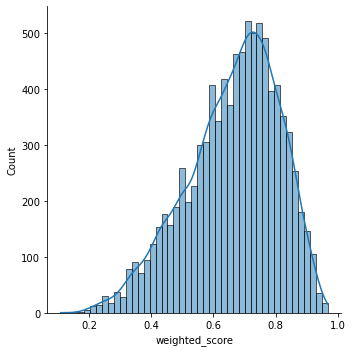

In [50]:
sns.displot(reviews_by_group['weighted_score'], kde=True)

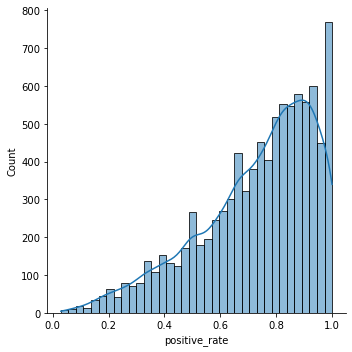

In [51]:
sns.displot(reviews_by_group['positive_rate'], kde=True)

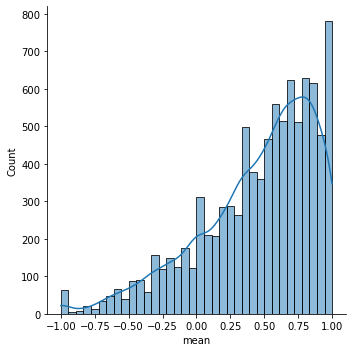

In [52]:
sns.displot(reviews_by_group['mean'], kde=True)

In [53]:
reviews_by_group.describe()

,count,mean,positive_rate,weighted_score
count,9364.000000,9364.000000,9301.000000,9301.000000
mean,685.295387,0.454351,0.732101,0.663346
std,3704.051137,0.428801,0.206574,0.147236
min,1.000000,-1.000000,0.029412,0.108476
25%,18.000000,0.200000,0.608974,0.571727
50%,58.000000,0.555556,0.778416,0.683285
75%,244.250000,0.788235,0.894737,0.772497
max,183234.000000,1.000000,1.000000,0.967521


In [54]:
reviews_by_group.to_csv('Datasets/reviews_processed.csv', index=True)